In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
# Check the work directory:  

os.getcwd()

'/kaggle/working'

In [3]:
# Change the work directory and Back to Kaggle:  

os.chdir('/kaggle/') 
os.getcwd() 

'/kaggle'

In [4]:
# Pass the file path to list all of the objects: 

os.listdir('/kaggle') 

# To see what is in the input:

os.listdir('/kaggle/input')  

os.listdir('/kaggle/input/titanic-dataset-1')  

['train.csv', 'test.csv', 'gender_submission.csv']

In [5]:
# Read the file path:  

titanic_train = pd.read_csv('input/titanic-dataset-1/train.csv') 

In [6]:
# Start off by checking the dimensions of dataset 
# and the variable data types:  

titanic_train.shape 

(891, 12)

In [7]:
titanic_train.dtypes 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# Check the info of the dataset:  

titanic_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Check the first 5 rows: a mixture of numeric columns and columns with text data.  

titanic_train.head(5)  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# A statistical summary of the variables

titanic_train.describe()  


# Note: describe() function can not summarize categorical columns
 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Describe the categorical variables

In [11]:
# make a list of categorical columns 

# step1: find the cols where dtype is an object  
# code: titanic_train.dtypes == 'object' 

# step2: take the index of those cols: 
categorical = titanic_train.dtypes[titanic_train.dtypes == 'object'].index 


# use 'categorical' to index back into titanic_train 
# rerun the describe():   
titanic_train[categorical].describe()  
 

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [12]:
# VARIABLE DESCRIPTIONS:
# survival        Survival
#                 (0 = No; 1 = Yes)
# pclass          Passenger Class
#                 (1 = 1st; 2 = 2nd; 3 = 3rd)
# name            Name
# sex             Sex
# age             Age
# sibsp           Number of Siblings/Spouses Aboard
# parch           Number of Parents/Children Aboard
# ticket          Ticket Number
# fare            Passenger Fare
# cabin           Cabin
# embarked        Port of Embarkation
#                 (C = Cherbourg; Q = Queenstown; S = Southampton) 

After looking at the var for the first time, you should ask yourself a few questions, and solve these questions later: 


**1. Do I need all of the variables?**

**2. Should I transform any variables?**

**3. Are there NA values, outliers or other strange values?**

**4. Should I create new variables?**


This data set is provided in conjunction with **a predictive modeling competition where the goal is to use the training data to predict whether passengers of the titanic listed in a second data set survived or not**. We won't be dealing with the second data set (known the test set) right now, but we will revisit this competition and make predictions in a future lesson on predictive modeling. 

# Do I need all of the variables? 

In [13]:
# DATA CLEANING 

In [14]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
# "PassengerId" is just a number assigned to each passenger. 
# It is nothing more than an arbitrary identifier;
# Let's remove it anyway.   

del titanic_train['PassengerId'] 


1. "Survived" indicates whether each passenger lived or died. 
Since predicting survival is our goal, we definitely need to keep it.

2. Features that **describe passengers numerically** or **group them into a few broad categories** could be useful for predicting survival.

   
3. The variables **Pclass, Sex, Age, SibSp, Parch, Fare, and Embarked** appear to fit this description, so let's keep all of them. 



In [16]:
# "Name" appears to be a character string of the name of each passenger. 

In [17]:
#  This command sorts only the first 15 names in the 'Name' column: 
#  Wrong Version  

sorted(titanic_train['Name'][0:15])   

['Allen, Mr. William Henry',
 'Andersson, Mr. Anders Johan',
 'Bonnell, Miss. Elizabeth',
 'Braund, Mr. Owen Harris',
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
 'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
 'Heikkinen, Miss. Laina',
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
 'McCarthy, Mr. Timothy J',
 'Moran, Mr. James',
 'Nasser, Mrs. Nicholas (Adele Achem)',
 'Palsson, Master. Gosta Leonard',
 'Sandstrom, Miss. Marguerite Rut',
 'Saundercock, Mr. William Henry',
 'Vestrom, Miss. Hulda Amanda Adolfina']

In [18]:
# The correct version:  
# This command sorts the entire 'Name' column

sorted(titanic_train['Name'])[0:15] 

['Abbing, Mr. Anthony',
 'Abbott, Mr. Rossmore Edward',
 'Abbott, Mrs. Stanton (Rosa Hunt)',
 'Abelson, Mr. Samuel',
 'Abelson, Mrs. Samuel (Hannah Wizosky)',
 'Adahl, Mr. Mauritz Nils Martin',
 'Adams, Mr. John',
 'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
 'Aks, Mrs. Sam (Leah Rosen)',
 'Albimona, Mr. Nassef Cassem',
 'Alexander, Mr. William',
 'Alhomaki, Mr. Ilmari Rudolf',
 'Ali, Mr. Ahmed',
 'Ali, Mr. William',
 'Allen, Miss. Elisabeth Walton']

In [19]:
# describe the Name category 
titanic_train['Name'].describe()  

count                         891
unique                        891
top       Braund, Mr. Owen Harris
freq                            1
Name: Name, dtype: object

1. Name variable has **889 unique** values.
   
2. In general, a **categorical variable** that is **unique to each case isn't useful** for prediction. 

3. We could extract last names to try to group family members together, but even then the number of categories would be very large. 
   
4. On the other hand, it can be nice to have some way to uniquely identify particular cases and names are interesting from a personal and historical perspective, so let's keep Name, knowing that we won't actually use it in any predictive models we make.    

In [20]:
# check the first 15 rows in col Ticket: 
titanic_train['Ticket'][0:15]

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
Name: Ticket, dtype: object

In [21]:
# describe the Ticket col: 
titanic_train['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

1. Ticket has **680 unique** values: almost as many as there are passengers.
   
2. **Categorical variables with almost as many levels as there are records are often not very useful for prediction.** 

   
3.  We could try to reduce the number of levels by grouping certain tickets together,
5. But the ticket numbers don't appear to follow any logical pattern we could use for grouping. Let's remove it. 

In [22]:
del titanic_train['Ticket']  

In [23]:
# Check the first 15 Cabins:  

titanic_train['Cabin'][0:15]  

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
Name: Cabin, dtype: object

In [24]:
# Wrong code: 
# sorted(titanic_train['Cabin'])[0:15]  

#Python can not compare NaN and C85 which is larger.   



In [25]:
titanic_train['Cabin'].describe() 

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

1. Cabin has **147 unique** values, which indicates it may not be particularly useful for prediction.
   
2. On the other hand, the names of the levels for the cabin variable seem to have a regular structure: each starts with a capital letter followed by a number.

   
3. We could use that structure to reduce the number of levels to **make categories large** enough that they might be useful for prediction. 
 

1. Removing variables is often more of an art than a science.
   
2. Data projects are iterative processes:

       you can start with a simple analysis or model using only a few variables and then expand later by adding more and more of the other variables you initially ignored or removed. 

# Should I Transform Any Variables?¶ 

1. When first loading a data set, some of the variables may be encoded as **data types** that **don't fit well** with what the **data really is or what it means**.  

2. For instance, Survived is just an integer variable that takes on the value 0 or 1 depending on whether a passenger died or survived respectively.

3. Variables that indicate a state or the **presence or absence** of something with the numbers **0 and 1** are sometimes called **indicator variables or dummy variables**. 

4. Indicator variables are essentially just a shorthand for encoding a categorical variable with 2 levels.

5. We could instead encode Survived as a categorical variable with more descriptive categories. 

In [26]:
# Describe the column "Survived": 

titanic_train['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [27]:
survived_col = pd.Categorical(titanic_train['Survived']) 
survived_col 

[0, 1, 1, 1, 0, ..., 0, 1, 0, 1, 0]
Length: 891
Categories (2, int64): [0, 1]

In [28]:
# 1. Transform the var of "Survived"
# 2. assign the value  
# 3. describe again 
new_survived = pd.Categorical(titanic_train['Survived']) 
new_survived = new_survived.rename_categories(['Died', 'Survived'])  

new_survived.describe()  

,counts,freqs
categories,,
Died,549,0.616162
Survived,342,0.383838


In [29]:
new_survived = pd.Categorical(titanic_train["Survived"]) 

new_survived = new_survived.rename_categories(["Died", "Survived"]) 

new_survived.describe() 

titanic_train['Survived'] = new_survived 

pd.Categorical(titanic_train['Survived'])  


['Died', 'Survived', 'Survived', 'Survived', 'Died', ..., 'Died', 'Survived', 'Died', 'Survived', 'Died']
Length: 891
Categories (2, object): ['Died', 'Survived']

1. Survived looks a little nicer as a categorical variable with appropriate category names.
   
2. But we're not going to change it.
   
3.  Since our goal is to **predict survival** for the Kaggle competition. 
   
5.  It turns out that when submitting predictions for the competition, the predictions need to be encoded as 0 or 1.
  
6. It would only complicate things to transform Survived, only to convert it back to 0 and 1 later. 

1. Another variable that has questionable data encoding is: Pclass.

2. **1st class would be considered "above" or "higher" than second class.**

3. But when encoded as an integer, 1 comes before 2.

4.  We can fix this by **transforming Pclass into an ordered categorical variable**  

In [30]:
new_Pclass = pd.Categorical(titanic_train['Pclass'], 
                           ordered = True) 

new_Pclass = new_Pclass.rename_categories(['Class1', 'Class2', 'Class3']) 

titanic_train['Pclass'] = new_Pclass  
titanic_train['Pclass'].describe()
  

count        891
unique         3
top       Class3
freq         491
Name: Pclass, dtype: object

In [31]:
print(new_Pclass[0] > new_Pclass[1]) 

True


In [32]:
new_Pclass.describe() 

,counts,freqs
categories,,
Class1,216,0.242424
Class2,184,0.206510
Class3,491,0.551066


In [33]:
print(new_Pclass.categories)  

Index(['Class1', 'Class2', 'Class3'], dtype='object')


In [34]:
print(new_Pclass[0] > new_Pclass[1]) 

True


1. Now revisit the Cabin variable.
  
2. It appears that each Cabin is indicated by the capital letter at the start of each factor level.

In [35]:
# Check unique cabins  

unique_cabin = titanic_train['Cabin'].unique() 
print(unique_cabin) 

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [36]:
print(type(unique_cabin)) 

# 'numpy.ndarray' object has no attribute 'describe' 

<class 'numpy.ndarray'>


In [37]:

print(type(titanic_train['Cabin'])) 

<class 'pandas.core.series.Series'>


1. If we grouped cabins just by this letter, 

2. We could reduce the number of levels while potentially extracting some useful information. 

In [38]:
# 1. Convert data type to str  
char_cabin = titanic_train['Cabin'].astype(str)

# 2. Take the first letter 
new_cabin = np.array([cabin[0] for cabin in char_cabin]) 

new_cabin = pd.Categorical(new_cabin)  

new_cabin.describe() 

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


1. 688 of the records have Cabin are "n" which is shortened from "nan". In other words, more than 2/3 of the passengers do not have a cabin listed at all.
   
2.  Discovering and deciding how to handle these sorts of peculiarities is an important part working with data and there often isn't a single correct answer.

3.  Since there are so many missing values, the Cabin variable might be devoid of useful information for prediction.

4.  On the other hand, a missing cabin variable could be an indication that a passenger died: after all, how would we know what cabin a passenger stayed in if they weren't around to tell the tale?



In [39]:
titanic_train['Cabin'] = new_cabin

# Are there NA Values, Outliers or Other Strange Values?

In [40]:
# In Python, you can detect missing values with:

# pd.isnull() function: 

In [41]:
# For instance: 

dummy_vector = pd.Series([1, None, None, 4, 7, None]) 
pd.isnull(dummy_vector) 

0    False
1     True
2     True
3    False
4    False
5     True
dtype: bool

1. Missing values in categorical data are not particularly troubling because you can simply treat NA as an additional category. 

2. Missing values in numeric variables are more troublesome, since you can't just treat a missing value as number.

3. Titanic dataset has some NA's in the Age variable: 

In [42]:
titanic_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

1. the count of age(712) is less than the total row count of data set(889).
   
2. This indicates missing data.

3. Using **np.where()** to get the row indexes of the missing values 

In [43]:
missing = np.where(titanic_train['Age'].isnull() == True)   # index wrapped with np.where()
missing

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
        196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
        270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
        334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
        409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
        459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
        511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
        564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
        613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
        692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
        773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
        839, 846, 849, 859, 863, 868, 878, 888]),)

In [44]:
# missing is a tuple that contains a single element, 
# which is the array of indices where Age is NaN. 
# access missing[0] --> retrieve the array of indices.  
 
len(missing[0])  

177

**With 177 missing values it's probably not a good idea to throw all those records away. Here are a few ways we could deal with them:**

1. Replace the null values with 0s
2. Replace the null values with some central value like the mean or median
3. Impute some other value
4. Split the data set into two parts: one set with where records have an Age value and another set where age is null.



* Setting missing values in numeric data to zero makes sense in some cases, but it doesn't make any sense here because a person's age can't be zero.
* Setting all ages to some central number like the median is a simple fix but there's no telling whether such a central number is a reasonable estimate of age without looking at the distribution of ages.
* For all we know each age is equally common.
* So, quickly get a sense of the distribution of ages by creating a histogram of the age variable with df.hist():



array([[<Axes: title={'center': 'Age'}>]], dtype=object)

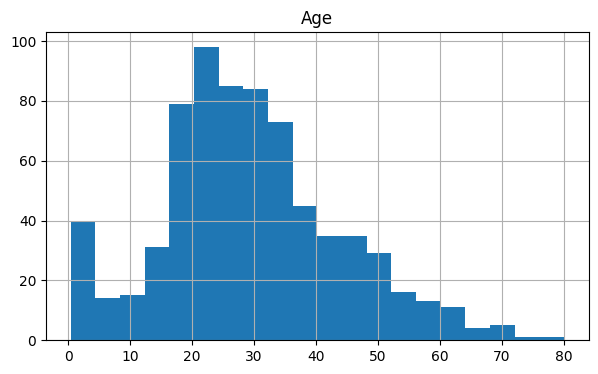

In [45]:
# Three elements in the plot:
# 1. Column to plot 
# 2. Size of plot 
# 3. Number of bins in a histogram 

titanic_train.hist(column = "Age", 
                   figsize = (7, 4), 
                    bins = 20 
                    )  

1. From the histogram, we see that ages between 20 and 30 are the most common, so filling in missing values with a central number like the mean or median wouldn't be entirely unreasonable.

2. Let's fill in the missing values with the median value of 28:




In [46]:
# 1. logical check 
# 2. value if check is True, 
# 3. value if the check is False. 


new_age_var = np.where (titanic_train['Age'].isnull(),           
                        28,                                     
                        titanic_train['Age'] 
                       )

titanic_train["Age"] = new_age_var 

titanic_train['Age'].describe()   



count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

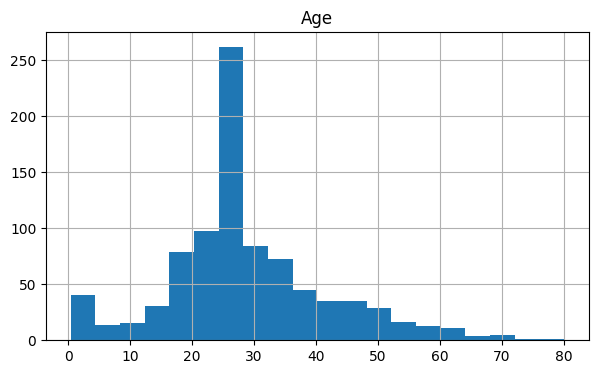

In [47]:
titanic_train.hist(column = 'Age', 
                   figsize = (7, 4),
                   bins = 20 
    
)

1. Let's consider outliers. Outliers are extreme numerical values: values that lie far away from the typical values a variable takes on.
   
2. Creating plots is one of the quickest ways to detect outliers.

   
3. For instance, the histogram above shows that 1 or 2 passengers were near age 80.    

1. investigate the "Fare" variable.
   
2. use a boxplot to:  

3. show the spread of the data

4. help identify outliers.  

<Axes: >

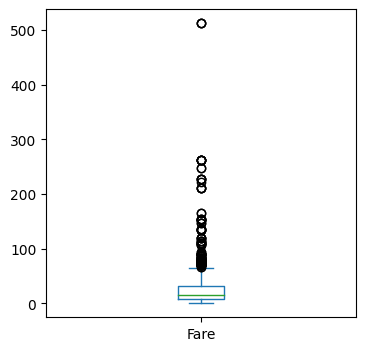

In [48]:
titanic_train['Fare'].plot(kind = 'box', 
                           figsize = (4, 4) 
                          ) 

In [49]:
# Find out who paid the highest fare: 

index = np.where(titanic_train['Fare'] == max(titanic_train['Fare'])) 

titanic_train.loc[index] 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
258,Survived,Class1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,n,C
679,Survived,Class1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,B,C
737,Survived,Class1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,B,C


1. In the graph there appears to be on passenger who paid more than all the others, but the output above shows that there were actually three passengers who all paid the same high fare.

2. Similar to NA values, there's no single cure for outliers. You can keep them, delete them or transform them in some way to try to reduce their impact. Even if you decide to keep outliers unchanged it is still worth identifying them since they can have disproportionately large influence on your results. Let's keep the three high rollers unchanged.

3. Data sets can have other strange values beyond missing values and outliers that you may need to address. Sometimes data is mislabeled or simply erroneous; **bad data can corrupt any sort of analysis so it is important to address these sorts of issues before doing too much work.**

# Should I Create New Variables?¶> 

1. The variables present when you load a data set aren't always the most useful variables for analysis.
   
2. Creating new variables that are derivations or combinations of existing ones is a common step to take before jumping into an analysis or modeling task.

3. Creating a new variable can be as simple as taking one variable and adding, multiplying, or dividing by another. 

4. Let's create a new variable, Family, that combines SibSp and Parch to indicate the total number of family members (siblings, spouses, parents, and children) a passenger has on board. 

In [50]:
# Create a new variable, Family 
# combines SibSp and Parch to indicate the total number of family members 
# (siblings, spouses, parents, and children) a passenger has on board.  

titanic_train["Family"] = titanic_train["SibSp"] + titanic_train["Parch"]  

In [51]:
# Find out who had the most family members on board: 

most_family = np.where(titanic_train["Family"] == max(titanic_train["Family"])) 

titanic_train.loc[most_family] 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
159,Died,Class3,"Sage, Master. Thomas Henry",male,28.0,8,2,69.55,n,S,10
180,Died,Class3,"Sage, Miss. Constance Gladys",female,28.0,8,2,69.55,n,S,10
201,Died,Class3,"Sage, Mr. Frederick",male,28.0,8,2,69.55,n,S,10
324,Died,Class3,"Sage, Mr. George John Jr",male,28.0,8,2,69.55,n,S,10
792,Died,Class3,"Sage, Miss. Stella Anna",female,28.0,8,2,69.55,n,S,10
846,Died,Class3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,69.55,n,S,10
863,Died,Class3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,69.55,n,S,10


Conclusion: 

1. There were 7 people on board with 8 siblings/spouses and 2 parents/children--they were probably all siblings of one another.
   
2. Tragically, all 7 of them passed away. 